In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set(font_scale=1)

Database file at https://www.kaggle.com/datasets/kaggle/us-consumer-finance-complaints

Connect to database file

In [2]:
connect = sqlite3.connect('database.sqlite')
cursor = connect.cursor()

Show tables

In [3]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table'""")
cursor.fetchall()

[('consumer_complaints',)]

In [4]:
complaints = pd.read_sql_query("""SELECT * 
                                  FROM consumer_complaints""",connect)
complaints.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,None,None,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None,None,"Navient Solutions, Inc.",MD,21402,None,None,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None,None,Resurgent Capital Services L.P.,GA,30106,None,None,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [5]:
query = cursor.execute("""ALTER TABLE consumer_complaints
                          RENAME COLUMN 'consumer_disputed?' TO consumer_disputed""")

In [6]:
complaints = pd.read_sql_query("""SELECT * 
                                  FROM consumer_complaints""",connect)
complaints.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,None,None,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None,None,"Navient Solutions, Inc.",MD,21402,None,None,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None,None,Resurgent Capital Services L.P.,GA,30106,None,None,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


Get how many complaints does each product have

In [7]:
product_count = pd.read_sql_query("""SELECT product,COUNT(*) AS count 
                                     FROM consumer_complaints
                                     GROUP BY product
                                     ORDER BY count DESC""",connect)
product_count

,product,count
0,Mortgage,186475
1,Debt collection,101052
2,Credit reporting,91854
3,Credit card,66468
4,Bank account or service,62563
5,Consumer Loan,20990
6,Student loan,15839
7,Payday loan,3877
8,Money transfers,3812
9,Prepaid card,2470


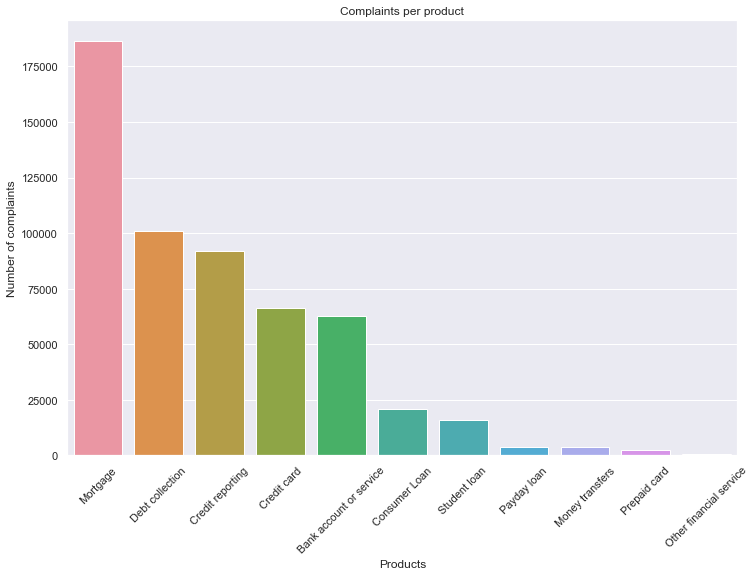

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=product_count,x='product',y='count')
ax.set(title='Complaints per product',xlabel='Products',ylabel='Number of complaints')
plt.xticks(rotation=45)
plt.show()

Get how many complaints does each subproduct have

In [9]:
subproduct_count = pd.read_sql_query("""SELECT product,sub_product AS subproduct,COUNT(*) AS count
                                         FROM consumer_complaints
                                         GROUP BY product,subproduct
                                         ORDER BY product ASC""",connect)
subproduct_count

,product,subproduct,count
0,Bank account or service,(CD) Certificate of deposit,2839
1,Bank account or service,Cashing a check without an account,464
2,Bank account or service,Checking account,44369
3,Bank account or service,Other bank product/service,10895
4,Bank account or service,Savings account,3996
5,Consumer Loan,Installment loan,5279
6,Consumer Loan,Pawn loan,59
7,Consumer Loan,Personal line of credit,1516
8,Consumer Loan,Title loan,329
9,Consumer Loan,Vehicle lease,1639


Get how many complaints does each company have

In [10]:
company_count = pd.read_sql_query("""SELECT company,COUNT(*) AS count
                                     FROM consumer_complaints
                                     GROUP BY company
                                     ORDER BY count DESC""",connect)
company_count

,company,count
0,Bank of America,55998
1,Wells Fargo & Company,42024
2,JPMorgan Chase & Co.,33881
3,Equifax,31828
4,Experian,30905
...,...,...
3600,1st Portfolio Holding Corporation,1
3601,1st Maryland Mortgage Corporation,1
3602,"1st Capital Mortgage, LLC",1
3603,"1st Capital Finance of South Carolina, Inc.",1


Select only top 10 companies with most complaints

In [11]:
top_10_companies = company_count.head(10)

Select rows that are from a company in top 10 (will be used later)

In [12]:
top_10_data = complaints.loc[complaints['company'].isin(top_10_companies['company'])]

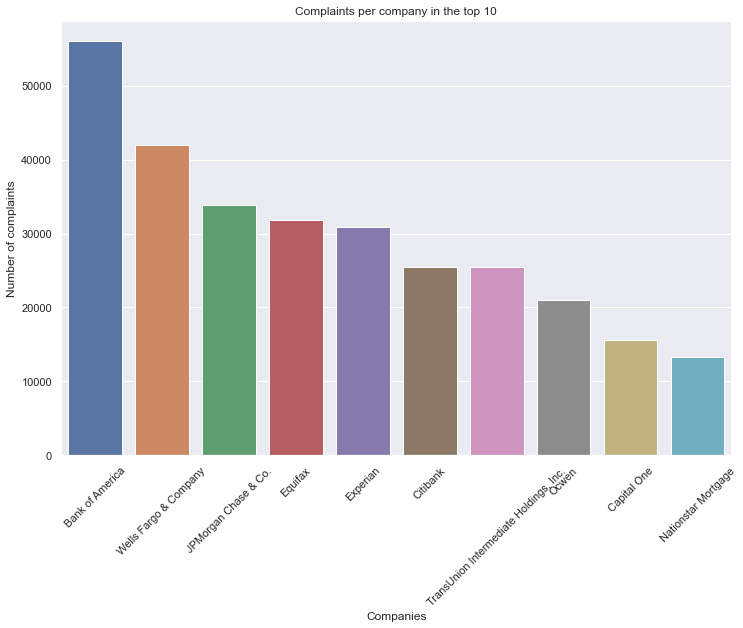

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=top_10_companies,x='company',y='count')
ax.set(title='Complaints per company in the top 10',xlabel='Companies',ylabel='Number of complaints')
plt.xticks(rotation=45)
plt.show()

Get how many complaints does each state have

In [14]:
state_count = pd.read_sql_query("""SELECT state,COUNT(*) AS count
                                   FROM consumer_complaints
                                   GROUP BY state
                                   ORDER BY count DESC""",connect)
state_count

,state,count
0,CA,81700
1,FL,53673
2,TX,41352
3,NY,38266
4,GA,24548
...,...,...
58,MH,27
59,MP,19
60,AS,17
61,PW,9


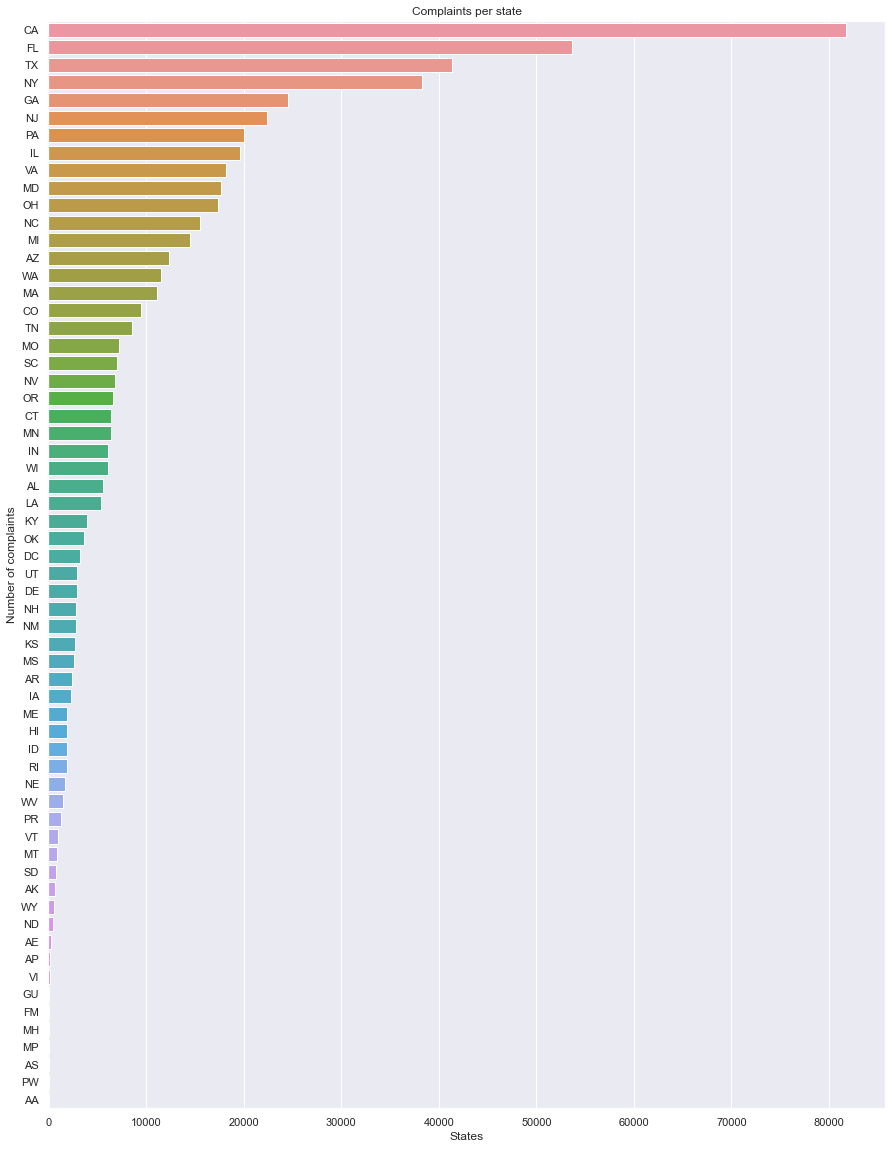

In [15]:
fig,ax = plt.subplots(figsize=(15,20))
ax = sns.barplot(data=state_count,y='state',x='count',orient='h')
ax.set(title='Complaints per state',xlabel='States',ylabel='Number of complaints')
plt.show()

Get how many times was the complaint answered in time

In [16]:
response = pd.read_sql_query("""SELECT timely_response AS response,COUNT(*) AS count
                                FROM consumer_complaints
                                GROUP BY response""",connect)
response

,response,count
0,No,14048
1,Yes,541909


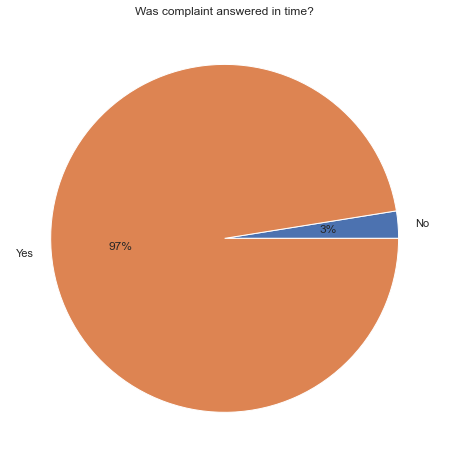

In [17]:
fig,ax = plt.subplots(figsize=(12,8))
plt.pie(response['count'],labels=response['response'], autopct='%.0f%%')
plt.title('Was complaint answered in time?')
plt.show()

Get how many times were complaints disputed

In [18]:
disputed = pd.read_sql_query("""SELECT consumer_disputed AS disputed,COUNT(*) AS count
                                FROM consumer_complaints
                                GROUP BY disputed""",connect)
disputed

,disputed,count
0,No,443823
1,Yes,112134


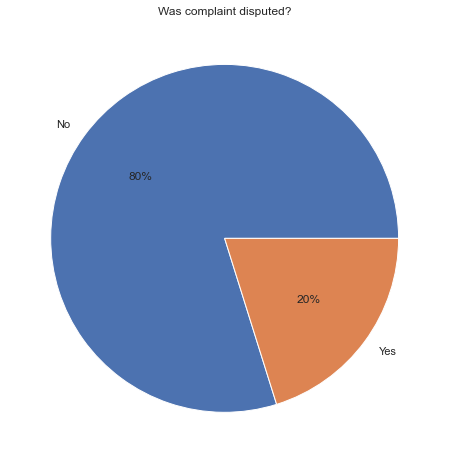

In [19]:
fig,ax = plt.subplots(figsize=(12,8))
plt.pie(disputed['count'],labels=disputed['disputed'], autopct='%.0f%%')
plt.title('Was complaint disputed?')
plt.show()

Get the different forms complaints are submitted

In [20]:
submitted = pd.read_sql_query("""SELECT submitted_via AS submitted,COUNT(*) AS count
                                 FROM consumer_complaints
                                 GROUP BY submitted""",connect)
submitted

,submitted,count
0,Email,344
1,Fax,8118
2,Phone,40026
3,Postal mail,36752
4,Referral,109379
5,Web,361338


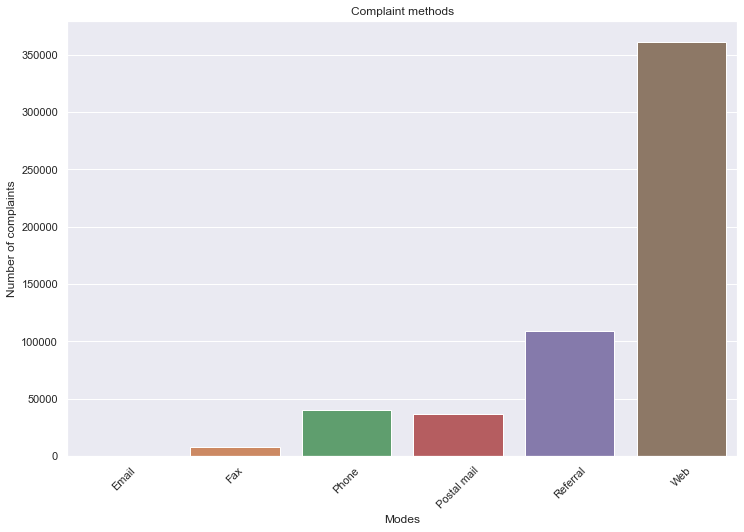

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=submitted,x='submitted',y='count')
ax.set(title='Complaint methods',xlabel='Modes',ylabel='Number of complaints')
plt.xticks(rotation=45)
plt.show()

Get the different responses companies gave to consumers 

In [22]:
closed = pd.read_sql_query("""SELECT company_response_to_consumer AS response,COUNT(*) AS count
                              FROM consumer_complaints
                              GROUP BY response""",connect)
closed

,response,count
0,Closed,13399
1,Closed with explanation,404293
2,Closed with monetary relief,38262
3,Closed with non-monetary relief,70237
4,Closed with relief,5305
5,Closed without relief,17909
6,In progress,3763
7,Untimely response,2789


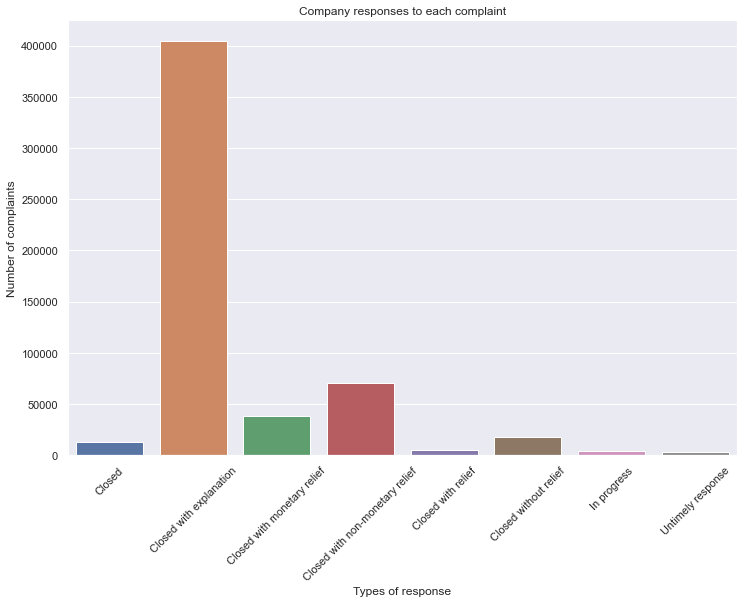

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=closed,x='response',y='count')
ax.set(title='Company responses to each complaint',xlabel='Types of response',ylabel='Number of complaints')
plt.xticks(rotation=45)
plt.show()

Re-format date columns

In [24]:
query = cursor.execute("""UPDATE consumer_complaints
                          SET date_received = SUBSTR(date_received, 7, 4)
                          || '-' || SUBSTR(date_received, 1, 2)
                          || '-' || SUBSTR(date_received, 4, 2)""")

In [25]:
query = cursor.execute("""UPDATE consumer_complaints
                          SET date_sent_to_company = SUBSTR(date_sent_to_company, 7, 4)
                          || '-' || SUBSTR(date_sent_to_company, 1, 2)
                          || '-' || SUBSTR(date_sent_to_company, 4, 2)""")

In [26]:
complaints = pd.read_sql_query("""SELECT * FROM consumer_complaints""",connect)
complaints.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,None,None,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,None,None,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,None,None,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None,None,"Navient Solutions, Inc.",MD,21402,None,None,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None,None,Resurgent Capital Services L.P.,GA,30106,None,None,Web,2013-08-30,Closed with explanation,Yes,Yes,511067


Get difference between the date the complaint was received and the day it was answered 

In [27]:
datediff = pd.read_sql_query("""SELECT JULIANDAY(date_sent_to_company)-JULIANDAY(date_received) AS datediff 
                                FROM consumer_complaints""",connect)
datediff

,datediff
0,4.0
1,4.0
2,19.0
3,0.0
4,0.0
...,...
555952,6.0
555953,22.0
555954,496.0
555955,0.0


Describe data

In [28]:
datediff.describe()

,datediff
count,555957.000000
mean,4.657344
std,17.200280
min,-1.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,993.000000


In [29]:
print("Complaints answered in more than 10 days: " + str(len(datediff.loc[datediff['datediff']>10])))
print("Complaints answered in more than 100 days: " + str(len(datediff.loc[datediff['datediff']>100])))
print("Complaints answered in more than 500 days: " + str(len(datediff.loc[datediff['datediff']>500])))

Complaints answered in more than 10 days: 44201
Complaints answered in more than 100 days: 3082
Complaints answered in more than 500 days: 46


Most complaints are resolved in four days or less. There are some outliers (and one complaint was resolved one day before it was received?)

Create year and month columns, then populate these columns

In [30]:
query = cursor.execute("""ALTER TABLE consumer_complaints
                          ADD COLUMN year NUMERIC;""")
query = cursor.execute("""UPDATE consumer_complaints 
                          SET year=strftime('%Y', date_received)""")

In [31]:
query = cursor.execute("""ALTER TABLE consumer_complaints
                          ADD COLUMN month NUMERIC;""")
query = cursor.execute("""UPDATE consumer_complaints 
                          SET month=strftime('%m', date_received)""")

In [32]:
complaints = pd.read_sql_query("""SELECT * 
                                  FROM consumer_complaints""",connect)
complaints.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id,year,month
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,None,None,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,2013,8
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,None,None,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,2013,8
2,2013-08-30,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,None,None,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,2013,8
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None,None,"Navient Solutions, Inc.",MD,21402,None,None,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,2013,8
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None,None,Resurgent Capital Services L.P.,GA,30106,None,None,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,2013,8


Get number of complaints per year (2016 data not completed)

In [33]:
years = pd.read_sql_query("""SELECT year, COUNT(*) AS count
                             FROM consumer_complaints
                             GROUP BY year""",connect)
years

,year,count
0,2011,2549
1,2012,72523
2,2013,108273
3,2014,153138
4,2015,168621
5,2016,50853


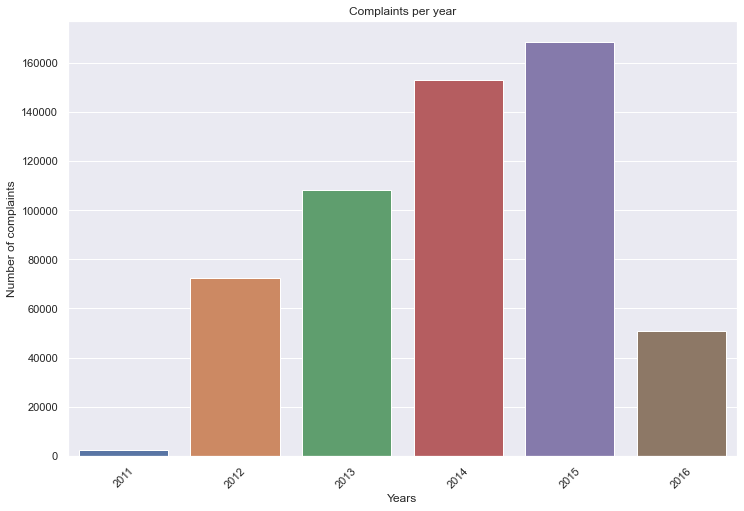

In [34]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=years,x='year',y='count')
ax.set(title='Complaints per year',xlabel='Years',ylabel='Number of complaints')
plt.xticks(rotation=45)
plt.show()

Get complaints per month

In [35]:
months = pd.read_sql_query("""SELECT month, COUNT(*) AS count
                              FROM consumer_complaints
                              GROUP BY month""",connect)
months

,month,count
0,1,52113
1,2,51719
2,3,59409
3,4,48986
4,5,41680
5,6,42967
6,7,45403
7,8,45439
8,9,41948
9,10,43804


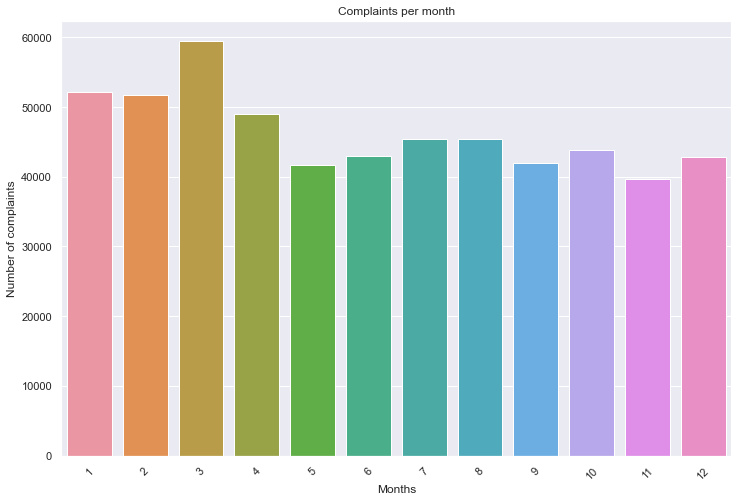

In [36]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=months,x='month',y='count')
ax.set(title='Complaints per month',xlabel='Months',ylabel='Number of complaints')
plt.xticks(rotation=45)
plt.show()

Since dynamic pivot tables cannot be built using sqlite3 I will use pandas 

Get database

In [37]:
complaints = pd.read_sql_query("""SELECT * FROM consumer_complaints""",connect)

Comparing product column against other columns 

Products against complaint methods (timely_response column used only to count)

In [38]:
table = pd.pivot_table(complaints,values='timely_response',index='product',columns='submitted_via',aggfunc='count',fill_value=0, sort=True)
table

submitted_via,Email,Fax,Phone,Postal mail,Referral,Web
product,,,,,,
Bank account or service,66,875,9391,2865,22795,26571
Consumer Loan,21,232,2058,892,2581,15206
Credit card,42,675,5249,4134,12231,44137
Credit reporting,22,1378,898,13556,6824,69176
Debt collection,7,867,8251,3987,6762,81178
Money transfers,0,40,1068,80,163,2461
Mortgage,176,3938,11744,10838,56453,103326
Other financial service,0,7,85,40,111,314
Payday loan,0,23,258,50,120,3426


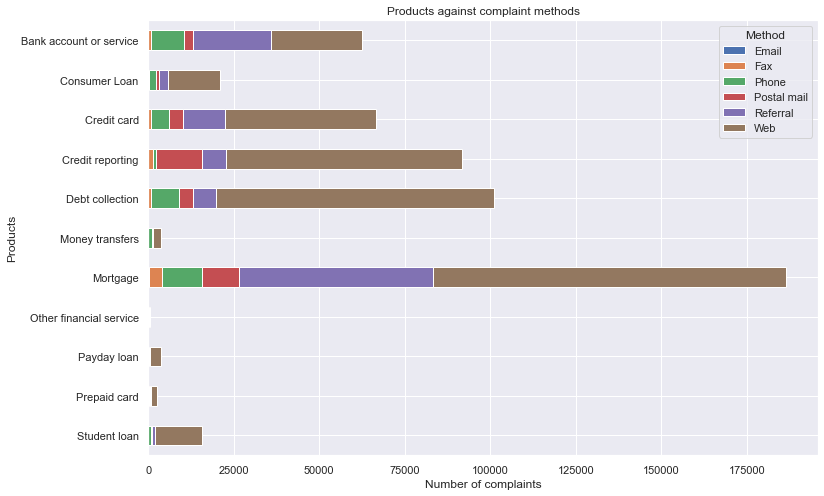

In [39]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Products against complaint methods',xlabel='Number of complaints',ylabel='Products')
plt.legend(title='Method')
plt.show()

Products against timely response (submitted_via column used only to count)

In [40]:
table = pd.pivot_table(complaints,values='submitted_via',index='product',columns='timely_response',aggfunc='count',fill_value=0,sort=True)
table

timely_response,No,Yes
product,,
Bank account or service,705,61858
Consumer Loan,507,20483
Credit card,597,65871
Credit reporting,147,91707
Debt collection,7118,93934
Money transfers,73,3739
Mortgage,4230,182245
Other financial service,47,510
Payday loan,406,3471


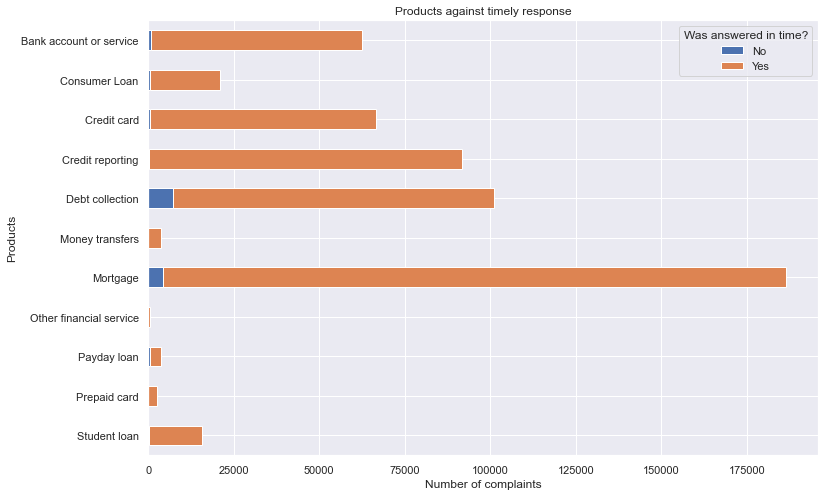

In [41]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Products against timely response',xlabel='Number of complaints',ylabel='Products')
plt.legend(title='Was answered in time?')
plt.show()

Products against response to consumer (timely_response column only used to count)

In [42]:
table = pd.pivot_table(complaints,values='timely_response',index='product',columns='company_response_to_consumer',aggfunc='count',fill_value=0,sort=True)
table

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,In progress,Untimely response
product,,,,,,,,
Bank account or service,2022,40347,13343,3355,1220,1992,241,43
Consumer Loan,421,16633,1460,1776,88,294,201,117
Credit card,503,38162,13781,6869,2521,4309,235,88
Credit reporting,303,62626,565,27158,0,0,1179,23
Debt collection,4913,75661,1487,16815,0,0,419,1757
Money transfers,41,3115,495,120,0,0,27,14
Mortgage,4894,150630,5007,12024,1401,10665,1335,519
Other financial service,12,436,59,20,0,0,9,21
Payday loan,146,3153,199,180,0,0,8,191


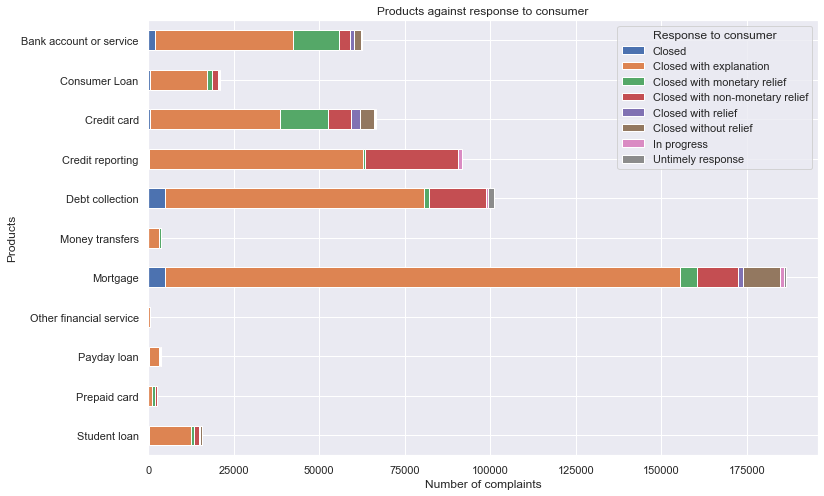

In [43]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Products against response to consumer',xlabel='Number of complaints',ylabel='Products')
plt.legend(title='Response to consumer')
plt.show()

Products against disputed answers (timely_response column only used to count)

In [44]:
table = pd.pivot_table(complaints,values='timely_response',index='product',columns='consumer_disputed',aggfunc='count',fill_value=0,sort=True)
table

consumer_disputed,No,Yes
product,,
Bank account or service,50255,12308
Consumer Loan,16302,4688
Credit card,52654,13814
Credit reporting,76782,15072
Debt collection,82761,18291
Money transfers,3273,539
Mortgage,143199,43276
Other financial service,446,111
Payday loan,3271,606


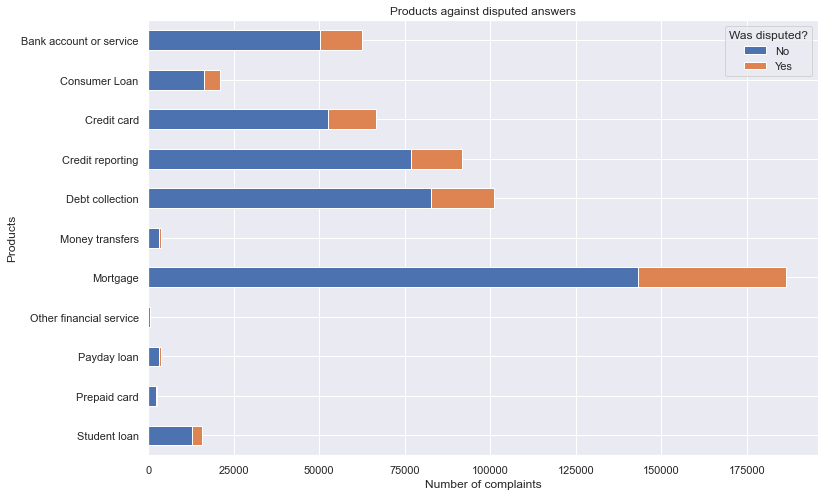

In [45]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Products against disputed answers',xlabel='Number of complaints',ylabel='Products')
plt.legend(title='Was disputed?')
plt.show()

Comparing state column against other columns

States against product (timely_response column only used to count)

In [46]:
table = pd.pivot_table(complaints,values='timely_response',index='state',columns='product',aggfunc='count',fill_value=0,sort=True)
table

product,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan
state,,,,,,,,,,,
AA,1,0,2,0,0,0,4,0,0,0,2
AE,21,15,24,47,31,2,68,0,0,1,10
AK,66,19,98,120,145,8,157,0,5,3,17
AL,600,373,552,1096,1312,29,1395,8,79,27,164
AP,7,9,20,28,46,0,39,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
VT,128,43,156,113,131,9,302,0,1,5,55
WA,1094,275,1284,1829,2253,83,4315,11,48,50,312
WI,572,266,993,798,1159,46,1955,7,75,45,209


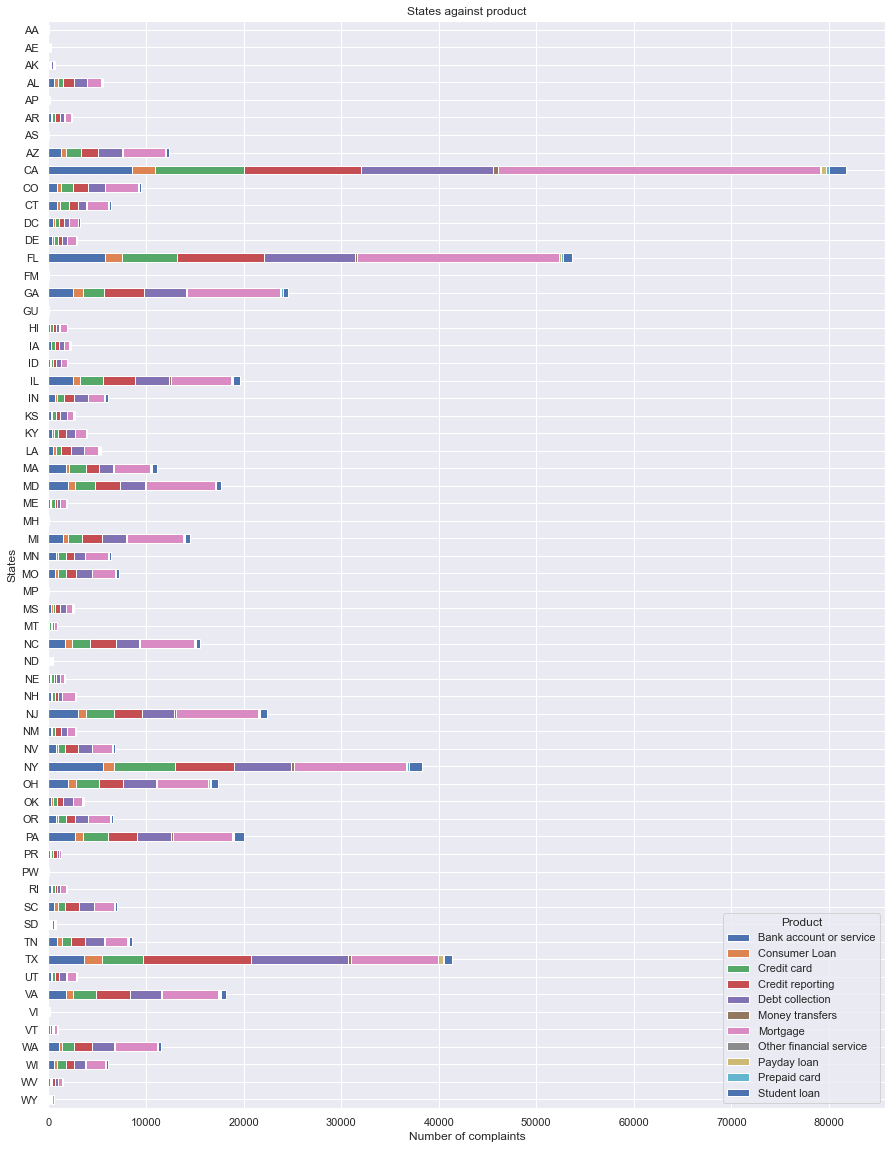

In [47]:
fig,ax = plt.subplots(figsize=(15,20))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='States against product',xlabel='Number of complaints',ylabel='States')
plt.legend(title='Product')
plt.show()

State against complaint methods (timely_response column only used to count)

In [48]:
table = pd.pivot_table(complaints,values='timely_response',index='state',columns='submitted_via',aggfunc='count',fill_value=0,sort=True)
table

submitted_via,Email,Fax,Phone,Postal mail,Referral,Web
state,,,,,,
AA,0,0,0,0,1,8
AE,0,1,3,7,29,179
AK,0,7,71,31,102,427
AL,1,81,465,309,806,3973
AP,0,0,1,0,10,142
...,...,...,...,...,...,...
VT,1,6,83,46,265,542
WA,10,103,625,542,2254,8020
WI,2,58,480,328,1230,4027


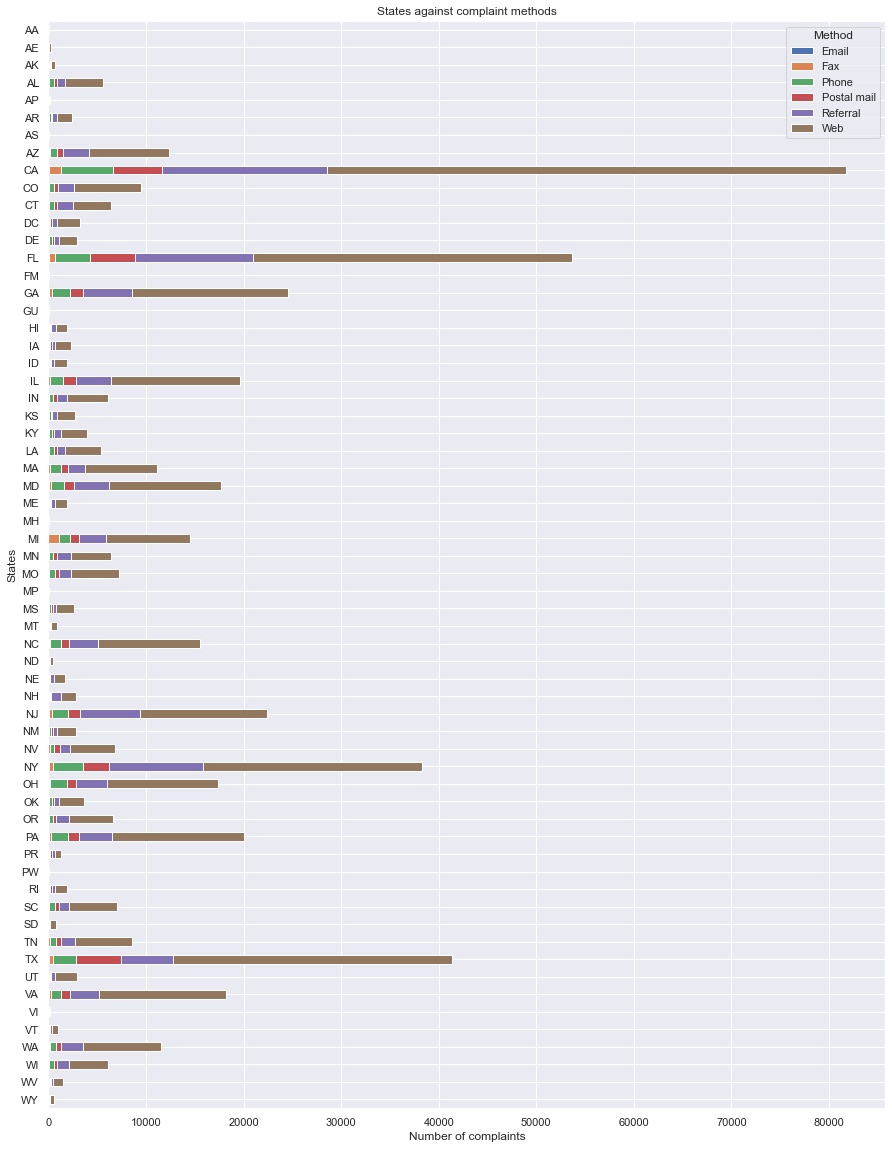

In [49]:
fig,ax = plt.subplots(figsize=(15,20))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='States against complaint methods',xlabel='Number of complaints',ylabel='States')
plt.legend(title='Method')
plt.show()

State against timely_response (submitted_via column only used to count)

In [50]:
table = pd.pivot_table(complaints,values='submitted_via',index='state',columns='timely_response',aggfunc='count',fill_value=0,sort=True)
table

timely_response,No,Yes
state,,
AA,0,9
AE,6,213
AK,11,627
AL,163,5472
AP,6,147
...,...,...
VT,24,919
WA,322,11232
WI,166,5959


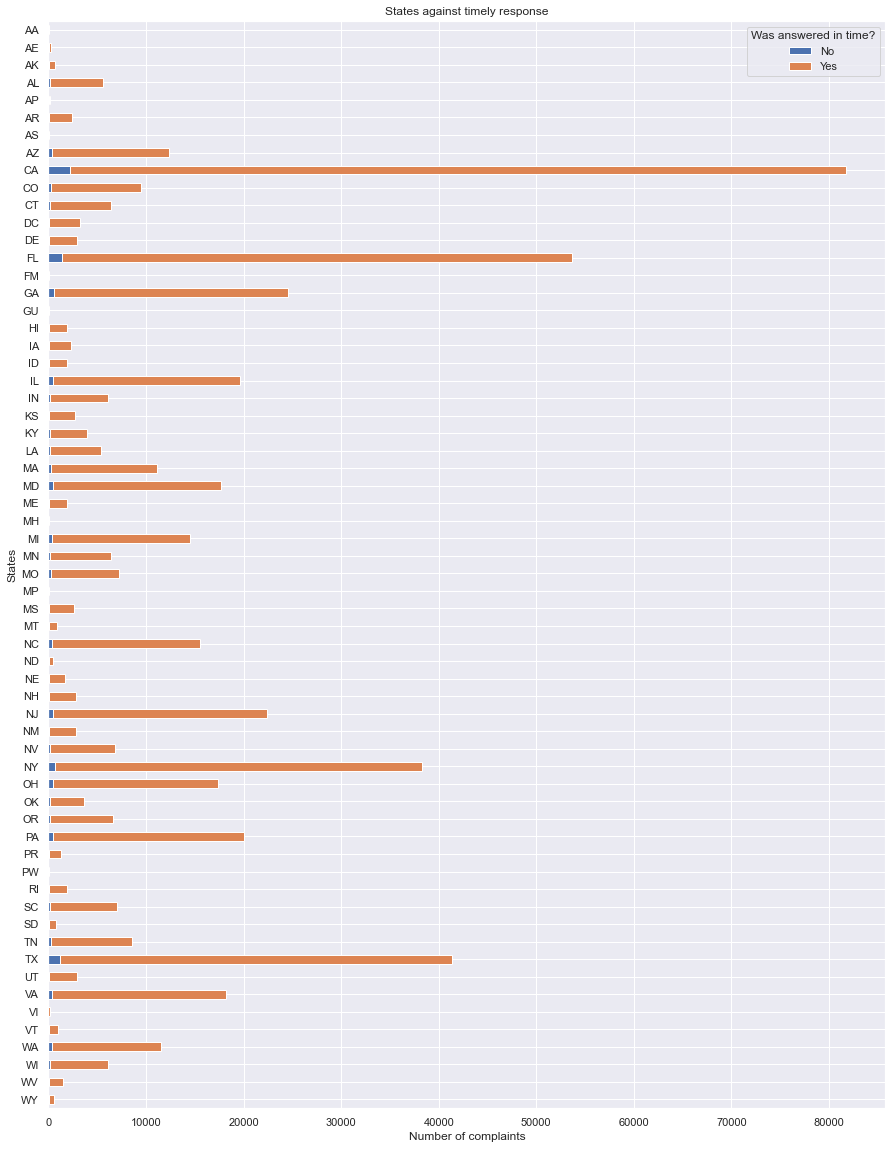

In [51]:
fig,ax = plt.subplots(figsize=(15,20))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='States against timely response',xlabel='Number of complaints',ylabel='States')
plt.legend(title='Was answered in time?')
plt.show()

State against response to consumer (timely_response column only used to count)

In [52]:
table = pd.pivot_table(complaints,values='timely_response',index='state',columns='company_response_to_consumer',aggfunc='count',fill_value=0,sort=True)
table

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,In progress,Untimely response
state,,,,,,,,
AA,0,9,0,0,0,0,0,0
AE,6,155,15,36,4,3,0,0
AK,12,438,43,112,6,19,6,2
AL,161,4145,314,776,42,133,35,29
AP,5,102,13,30,1,0,1,1
...,...,...,...,...,...,...,...,...
VT,26,635,111,108,15,41,1,6
WA,251,8456,727,1485,107,402,63,63
WI,107,4389,513,758,76,205,32,45


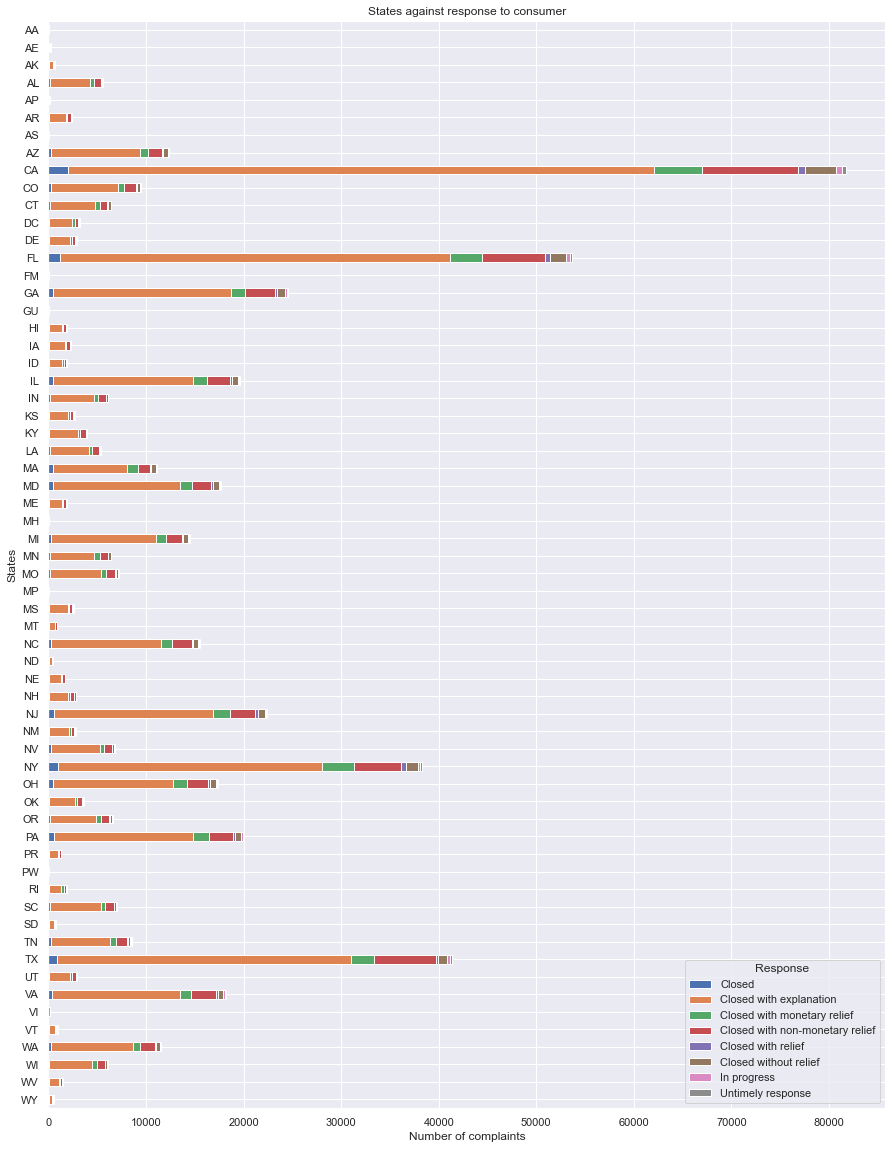

In [53]:
fig,ax = plt.subplots(figsize=(15,20))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='States against response to consumer',xlabel='Number of complaints',ylabel='States')
plt.legend(title='Response')
plt.show()

State against disputed answers (timely_response column only used to count)

In [54]:
table = pd.pivot_table(complaints,values='timely_response',index='state',columns='consumer_disputed',aggfunc='count',fill_value=0,sort=True)
table

consumer_disputed,No,Yes
state,,
AA,6,3
AE,175,44
AK,517,121
AL,4520,1115
AP,116,37
...,...,...
VT,768,175
WA,9101,2453
WI,4851,1274


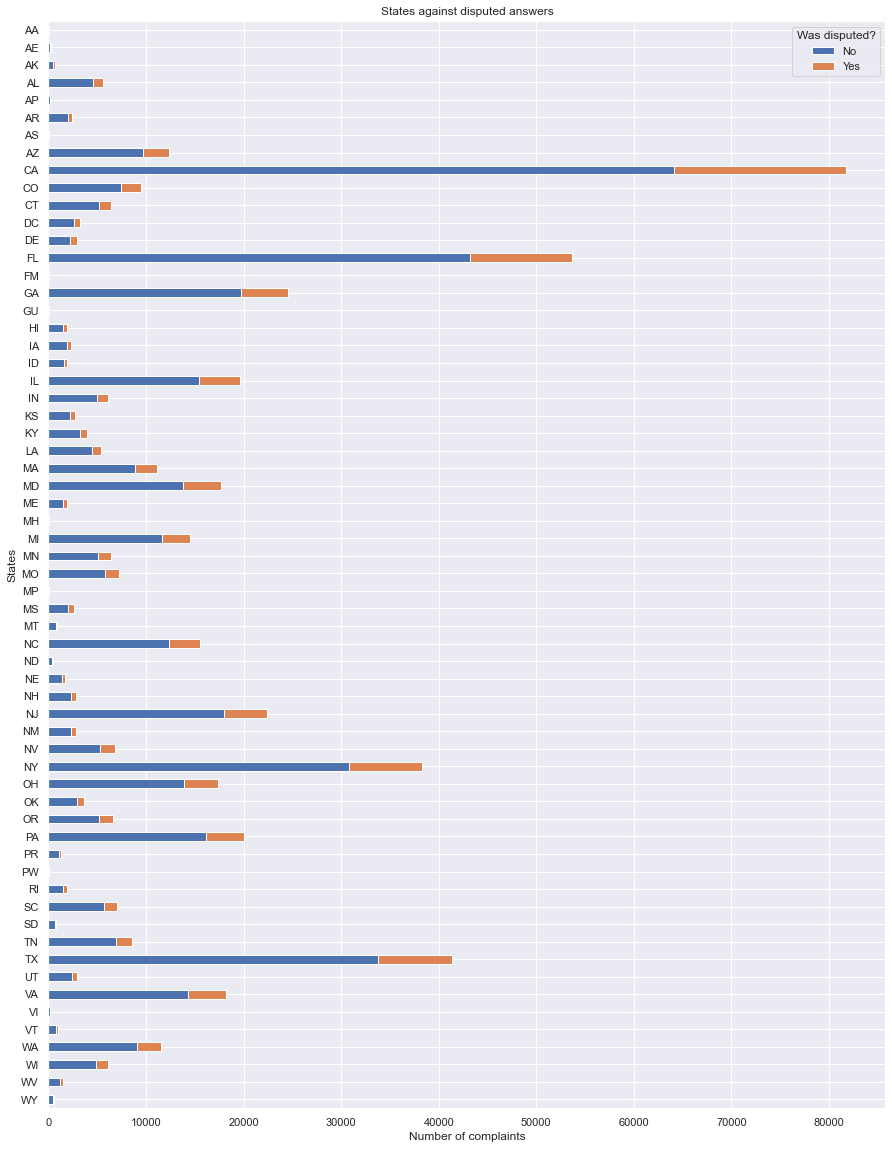

In [55]:
fig,ax = plt.subplots(figsize=(15,20))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='States against disputed answers',xlabel='Number of complaints',ylabel='States')
plt.legend(title='Was disputed?')
plt.show()

Comparing company column against other columns (only top 10 companies with most complaints will be used)

Companies against products (timely_response column only used to count)

In [56]:
table = pd.pivot_table(top_10_data,values='timely_response',index='company',columns='product',aggfunc='count',fill_value=0,sort=True)
table

product,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan
company,,,,,,,,,,,
Bank of America,10440,541,7224,37,1173,200,36228,44,8,33,70
Capital One,1842,921,10261,185,1552,15,825,9,2,14,2
Citibank,2049,670,12245,143,2053,72,7632,23,17,131,505
Equifax,11,31,33,31694,25,0,27,2,0,0,5
Experian,13,17,37,30768,38,0,23,2,1,0,6
JPMorgan Chase & Co.,7088,725,7803,82,1241,164,16003,40,2,22,711
Nationstar Mortgage,20,10,0,10,245,0,12964,1,0,0,0
Ocwen,59,30,6,34,456,2,20388,2,1,0,0
"TransUnion Intermediate Holdings, Inc.",6,9,12,25458,31,0,12,0,1,0,5


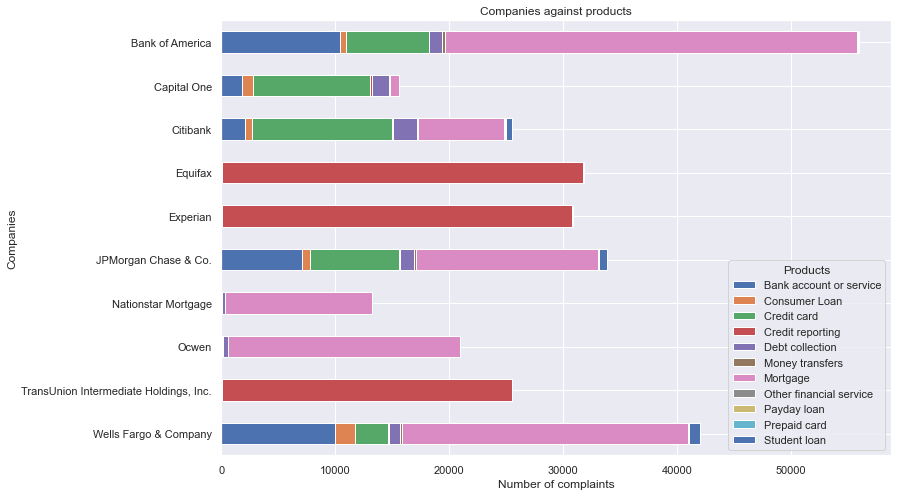

In [57]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Companies against products',xlabel='Number of complaints',ylabel='Companies')
plt.legend(title='Products')
plt.show()

Companies against complaint methods (timely_response column only used to count)

In [58]:
table = pd.pivot_table(top_10_data,values='timely_response',index='company',columns='submitted_via',aggfunc='count',fill_value=0,sort=True)
table

submitted_via,Email,Fax,Phone,Postal mail,Referral,Web
company,,,,,,
Bank of America,47,966,4439,3098,19299,28149
Capital One,9,171,1500,933,2990,10025
Citibank,15,388,2067,1678,5542,15850
Equifax,4,479,338,4329,2225,24453
Experian,9,448,286,4855,2268,23039
JPMorgan Chase & Co.,23,617,2831,1995,10504,17911
Nationstar Mortgage,5,309,752,727,2803,8654
Ocwen,13,496,1292,1411,5030,12736
"TransUnion Intermediate Holdings, Inc.",9,402,255,3941,2074,18853


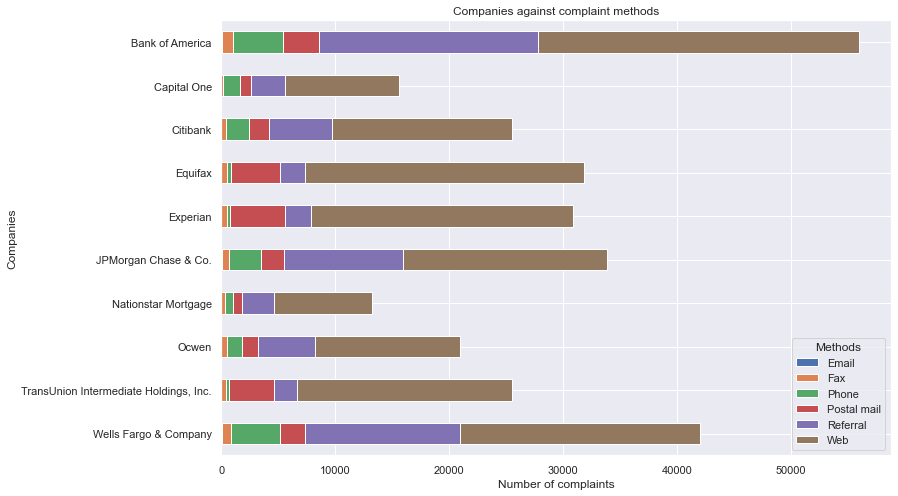

In [59]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Companies against complaint methods',xlabel='Number of complaints',ylabel='Companies')
plt.legend(title='Methods')
plt.show()

Companies against response to consumer (timely_response column only used to count)

In [60]:
table = pd.pivot_table(top_10_data,values='timely_response',index='company',columns='company_response_to_consumer',aggfunc='count',fill_value=0,sort=True)
table

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Closed with relief,Closed without relief,In progress,Untimely response
company,,,,,,,,
Bank of America,976,37212,4413,7640,867,4531,232,127
Capital One,176,10068,2499,1313,384,1135,50,3
Citibank,139,15700,4689,2758,680,1347,124,103
Equifax,40,23877,22,7645,0,0,244,0
Experian,139,16899,398,12776,0,0,693,0
JPMorgan Chase & Co.,587,25722,3253,1308,813,2011,184,3
Nationstar Mortgage,322,12466,28,166,6,124,138,0
Ocwen,1085,18245,162,401,136,902,44,3
"TransUnion Intermediate Holdings, Inc.",16,18805,94,6394,0,0,225,0


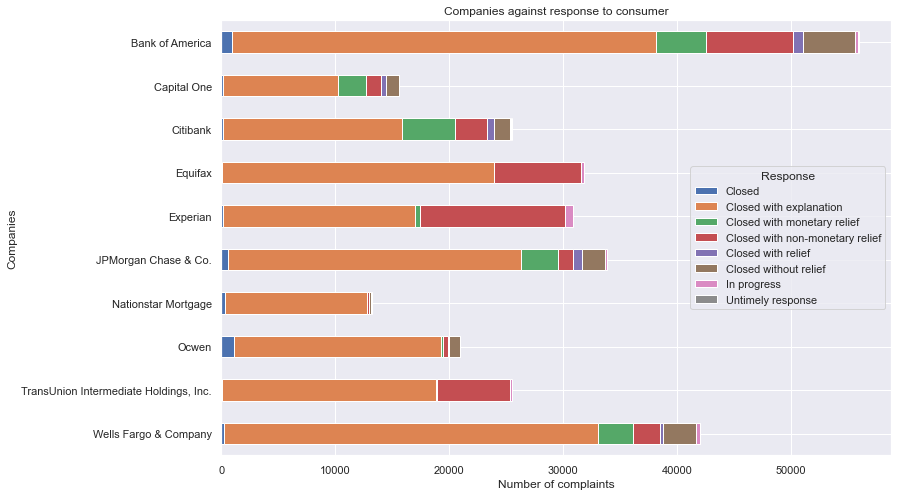

In [61]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Companies against response to consumer',xlabel='Number of complaints',ylabel='Companies')
plt.legend(title='Response')
plt.show()

Companies against timely response (submitted_via column only used to count)

In [62]:
table = pd.pivot_table(top_10_data,values='submitted_via',index='company',columns='timely_response',aggfunc='count',fill_value=0,sort=True)
table

timely_response,No,Yes
company,,
Bank of America,1552,54446
Capital One,59,15569
Citibank,314,25226
Equifax,0,31828
Experian,6,30899
JPMorgan Chase & Co.,83,33798
Nationstar Mortgage,125,13125
Ocwen,539,20439
"TransUnion Intermediate Holdings, Inc.",0,25534


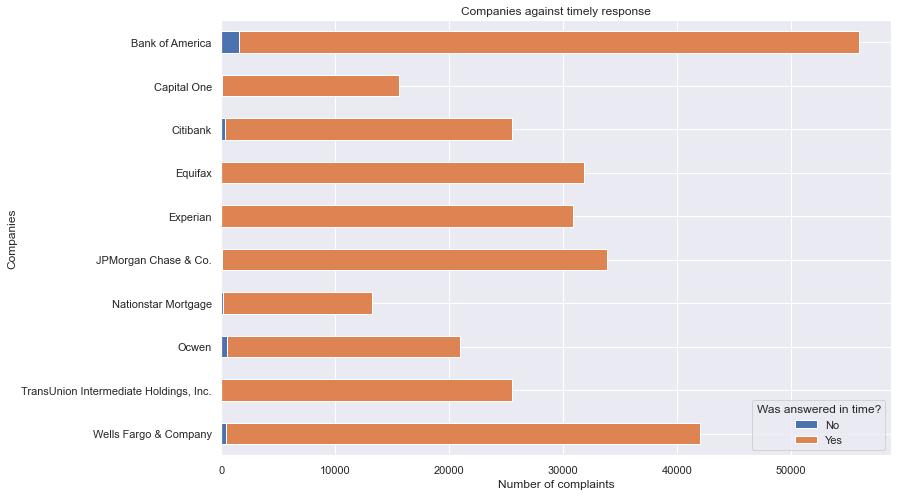

In [63]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Companies against timely response',xlabel='Number of complaints',ylabel='Companies')
plt.legend(title='Was answered in time?')
plt.show()

Companies against disputed answers (timely_response column only used to count)

In [64]:
table = pd.pivot_table(top_10_data,values='timely_response',index='company',columns='consumer_disputed',aggfunc='count',fill_value=0,sort=True)
table

consumer_disputed,No,Yes
company,,
Bank of America,43518,12480
Capital One,12693,2935
Citibank,20295,5245
Equifax,25181,6647
Experian,27014,3891
JPMorgan Chase & Co.,26165,7716
Nationstar Mortgage,10093,3157
Ocwen,15911,5067
"TransUnion Intermediate Holdings, Inc.",21710,3824


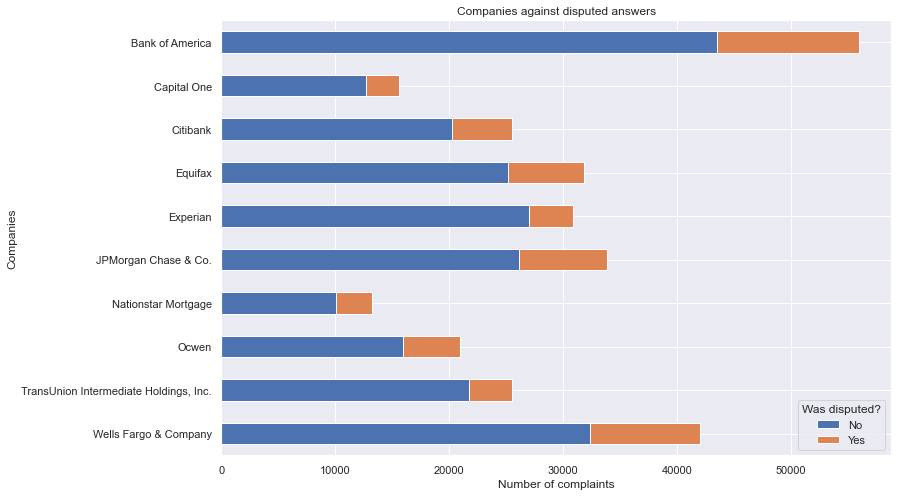

In [65]:
fig,ax = plt.subplots(figsize=(12,8))
table.sort_index(ascending=False).plot(kind='barh',stacked=True,ax=ax)
ax.set(title='Companies against disputed answers',xlabel='Number of complaints',ylabel='Companies')
plt.legend(title='Was disputed?')
plt.show()